In [1]:
#TO remove :
import os
directory = os.getcwd()
print(directory)

C:\Users\s1114237\OneDrive - Syngenta\Formations\Training\EPFL extension school\Machine_Learning_EPFL-extension-school\Course#2 Data Analysis


In [2]:
os.chdir("Machine_Learning_EPFL-extension-school\Course#2 Data Analysis")
directory = os.getcwd()
print(directory)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Machine_Learning_EPFL-extension-school\\Course#2 Data Analysis'

# Working with text Data
## Pandas string functions

Textual data can often be messy and difficult to work with since it is usually not in a standardized format ready for analysis. In order to understand how to work with textual data, we must begin by understanding how to work with strings in pandas. String functions in pandas are similar to built-in string functions from Python which we saw in the first course.

You might wonder, why we need to bother with string functions from pandas and not just use the Python standard ones? The reason is that Python’s string functions are for individual string objects, while the pandas functions are for Series and DataFrames. So you can think of the pandas string functions as an extension that allows us to operate on an entire Series or DataFrame of strings. As most of the time, the text data that we will be working with will already be in the form of a Series or a DataFrame, so using the specific functions from pandas will make our life a lot easier.

So how exactly do we use pandas string functions?

''' For pandas Series the string functions are accessed using the str attribute.
They have the following general form: Series.str.<function/property>
with the function names matching the corresponding string functions in Python.
You can find a full list of available functions here.

Note: The str attribute is not defined for the pandas DataFrame, only for Series. We must apply any string function column-wise. ''' 

In [3]:
import pandas as pd
import numpy as np

In [4]:
s = pd.Series(
    [
        "0",
        "John Wood",
        "Colin Welsh",
        "my list",
        "02456",
        np.nan,
        "HELLO WORLD",
        "water%",
    ]
)
s

0              0
1      John Wood
2    Colin Welsh
3        my list
4          02456
5            NaN
6    HELLO WORLD
7         water%
dtype: object

Here, we defined a Series of different string objects. If you recall from the first course, the python function str.lower() takes as input a string object and converts it to lowercase. Similarly, the pandas function str.lower() takes as input a Series and converts all strings in this Series to lowercase. Let’s give it a try:

In [5]:
s.str.lower()

0              0
1      john wood
2    colin welsh
3        my list
4          02456
5            NaN
6    hello world
7         water%
dtype: object

The function str.upper() is the opposite of this:

In [6]:
s.str.upper()

0              0
1      JOHN WOOD
2    COLIN WELSH
3        MY LIST
4          02456
5            NaN
6    HELLO WORLD
7         WATER%
dtype: object

We can get the length of each string in the Series:

In [7]:
s.str.len()

0     1.0
1     9.0
2    11.0
3     7.0
4     5.0
5     NaN
6    11.0
7     6.0
dtype: float64

For data cleaning and manipulations, we will be especially interested in splitting, stripping and replacing strings. Let’s give these a try:

In [8]:
s.str.split(" ")

0               [0]
1      [John, Wood]
2    [Colin, Welsh]
3        [my, list]
4           [02456]
5               NaN
6    [HELLO, WORLD]
7          [water%]
dtype: object

The function str.split() splits each string in the Series on the character provided inside the quotation marks. In our case, we asked the string to be split on the space character. Note that the function returns a Series of lists, where each list contains the substrings that were obtained by splitting on the given character(s). So for example, since the first string '0' did not contain the space character, the list contains a single string which is this original string. On the other hand, the string 'John Wood' was split into two strings. A nice feature of the str.split() function is that we can choose to have the results returned to us in a DataFrame instead of a Series of lists. We do this by including the expand=True parameter as follows:

In [9]:
substrings = s.str.split(" ", expand=True)
substrings

,0,1
0,0,None
1,John,Wood
2,Colin,Welsh
3,my,list
4,02456,None
5,NaN,NaN
6,HELLO,WORLD
7,water%,None


Note that the number of columns is determined by the maximum size of the lists. In our case, we had lists of size one and two so the DataFrame has two columns. For strings that were not split pandas filled the second column of the DataFrame contains the entry 'None'. We can now easily access the substring by just indexing the DataFrame. For example

In [10]:
substrings[1]

0     None
1     Wood
2    Welsh
3     list
4     None
5      NaN
6    WORLD
7     None
Name: 1, dtype: object

Let’s now look at replacing a substring. The general syntax of the function is the following

In [11]:
s.str.replace("%", " percent ")

0                 0
1         John Wood
2       Colin Welsh
3           my list
4             02456
5               NaN
6       HELLO WORLD
7    water percent 
dtype: object

If instead we just want to remove a specific substring or character we can use the function str.replace() and choose to replace it with the empty string. For example

In [12]:
s.str.replace("%", "")

0              0
1      John Wood
2    Colin Welsh
3        my list
4          02456
5            NaN
6    HELLO WORLD
7          water
dtype: object

Another useful function for us will be to index a particular slice of each string. For example suppose we want to get the first two characters of every string. We can do this by using the index directly

In [13]:
s.str[0:2]

0      0
1     Jo
2     Co
3     my
4     02
5    NaN
6     HE
7     wa
dtype: object

In [14]:
s.str.slice(0, 2)

0      0
1     Jo
2     Co
3     my
4     02
5    NaN
6     HE
7     wa
dtype: object

We can even combine the action of slicing and replacing using the str.slice_replace() function. Here we must mention first the slice of the string that we want to be replaced and then what we want it replaced by. The general syntax looks like this :
***This command takes the substring at positions i to j-1 and replaces it with the string 'str'. Let’s give it a try***

In [15]:
#str.slice_replace(i,j,'str')
s.str.slice_replace(0, 2, "___")

0             ___
1      ___hn Wood
2    ___lin Welsh
3        ___ list
4          ___456
5             NaN
6    ___LLO WORLD
7         ___ter%
dtype: object

A common operation when working with text data is to test whether character strings contain a certain substring or pattern of characters. For instance, if we were only interested in posts about Andrew Wiggins, we’d need to match all posts that make mention of him and avoid matching posts that don’t mention him.

Another function that we want to draw your attention to is the str.contains(). When working with text data it is quite common to test whether a certain substring or pattern is present in the strings of our dataset. This can also be useful if we want to obtain all the entries of a dataset that contain some keyword. The str.contains() function returns a Series of True/False values that indicate whether each string contains the given keyword. We can then use this Series of booleans to index our original Series and obtain those entries which correspond to the True values.

Here is an example

In [16]:
flag = s.str.contains("0")
flag

0     True
1    False
2    False
3    False
4     True
5      NaN
6    False
7    False
dtype: object

Note that the NaN entry returned NaN. If we wanted to make sure that we get back a Series of only True and False values we could use the parameter na=False which replaces NaN with a False:

In [17]:
flag = s.str.contains("0", na=False)
flag

0     True
1    False
2    False
3    False
4     True
5    False
6    False
7    False
dtype: bool

Let’s now get back the entries which contain the character '0':

In [18]:
s[flag]

0        0
4    02456
dtype: object

This concludes our overview of string functions in pandas. For a full list the functions available for us and their descriptions you can consult the pandas documentation Working with text data.

## Example : cleaning up the movies dataset

Now that we have gotten an overview of the string functions available to us in pandas, it is time we put them to use with a real dataset. To do this we will use a dataset that you have seen before Kaggle TMDB 5000 Movie DataSet. You can download the csv file from the Resources tab and save it in your working directory.

Let’s load the data.

In [19]:
# Import libraries
import pandas as pd
import numpy as np

# Load the data
movies = pd.read_csv("Ressources/c2_tmdb_5000_movies.csv")

As we will focus on applying pandas string functions, let’s take a look at the first 5 rows of the first 3 text-based columns.

In [20]:
# Show top entries of the first 3 text-based columns
movies.select_dtypes("object").iloc[:5,:3]

,genres,homepage,keywords
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":..."


As you can see the data is quite messy. Let’s focus on the column genres, as the entries here look particularly difficult to work with. We start by defining a Series corresponding to this column.

In [21]:
genres = movies["genres"]
genres[0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

We would like to replace this entry with just the names of the genres separated by a comma such as: 'Action, Adventure, Fantasy, Science Fiction' 

How can we go about this? Since each entry is a JSON string, we could use the json module.

In [22]:
import json

json_obj = json.loads(genres[0])  # Load json string
names = [
    x["name"] for x in json_obj
] 
names

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

We can join lists of words into a string using the join function.

```", ".join(names)```

We can easily apply this to the entire Series genres by wrapping everything into a lambda function:

In [23]:
genres.map(lambda s: ', '.join(x['name'] for x in json.loads(s)))

0       Action, Adventure, Fantasy, Science Fiction
1                        Adventure, Fantasy, Action
2                          Action, Adventure, Crime
3                    Action, Crime, Drama, Thriller
4                Action, Adventure, Science Fiction
                           ...                     
4798                        Action, Crime, Thriller
4799                                Comedy, Romance
4800               Comedy, Drama, Romance, TV Movie
4801                                               
4802                                    Documentary
Name: genres, Length: 4803, dtype: object

However, let’s see how we can use the text commands from the last unit to manually extract genres. Let’s start by striping the strings of the square brackets.

We put this inside a function because we will keep adding some other functions inside and then we can make a single call to execute them all. For now, let’s see where this version of the function gets us to.

In [24]:
def transform(s):
    s = s.str.strip("[]")
    return s

genres = transform(genres)
genres[0]

'{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}'

So this successfully removed the square brackets. Now we would like to get rid of the other additional characters. We can do this by calling several string replacement functions, one for each sequence of characters that we would like to remove. Let’s give this a try.

In [25]:
def transform(s):
    s = s.str.strip("[]")
    s = s.str.replace("{", "", regex=True)
    s = s.str.replace("}", "", regex=True)
    s = s.str.replace(",", "", regex=True)
    s = s.str.replace('"id":', "", regex=True)
    s = s.str.replace('"name":', "", regex=True)
    s = s.str.replace('"', "", regex=True)
    return s

genres = transform(genres)
genres[0]

' 28  Action  12  Adventure  14  Fantasy  878  Science Fiction'

This is now definitely closer to what we wanted. The last challenge is to get rid of the numbers inside the string. But how can we do this? One option would be to use the replace method to remove each digit separately. This is quite tedious but it gets the job done. Let’s give it a try by adding the following lines inside the definition of our function transform().

In [26]:
def transform(s):
    s = s.str.strip("[]")
    s = s.str.replace("{", "", regex=True)
    s = s.str.replace("}", "", regex=True)
    s = s.str.replace(",", "", regex=True)
    s = s.str.replace('"id":', "", regex=True)
    s = s.str.replace('"name":', "", regex=True)
    s = s.str.replace('"', "", regex=True)
    s = s.str.replace("0", "", regex=True)
    s = s.str.replace("1", "", regex=True)
    s = s.str.replace("2", "", regex=True)
    s = s.str.replace("3", "", regex=True)
    s = s.str.replace("4", "", regex=True)
    s = s.str.replace("5", "", regex=True)
    s = s.str.replace("6", "", regex=True)
    s = s.str.replace("7", "", regex=True)
    s = s.str.replace("8", "", regex=True)
    s = s.str.replace("9", "", regex=True)
    return s
genres = transform(genres)
genres[0]


'   Action    Adventure    Fantasy    Science Fiction'

``` In the following unit, we will learn about regular expressions which enable string matching with less code. For example, instead of removing every digit separately, we can use regular expressions to match all numbers with a single regular expression pattern. Below, we show two alternative approaches to remove digits using regular expressions.

1st alternative
s = s.str.replace(‘[0-9]+’,’’, regex=True)

2nd alternative
s = s.str.replace(‘\d+’,’’, regex=True)

Don’t worry if you don’t understand how regular expressions work, as this is the topic of the next unit! ```

Almost there! We would like to remove some of the additional white spaces and also make sure to include a comma to separate the entries. There are 3 white spaces in front of the first entry and 4 white spaces separating each of the remaining entries. So what we could do is first replace all blocks of 4 white spaces with a ', ' and then remove the remaining three white spaces at the front. Let’s add the following two cleaning steps in the transform() function.

``` Note that the order in which we are adding the functions inside our routine is important since the transformations on the strings are applied in sequential order. ```

In [27]:
def transform(s):
    s = s.str.strip("[]")
    s = s.str.replace("{", "", regex=True)
    s = s.str.replace("}", "", regex=True)
    s = s.str.replace(",", "", regex=True)
    s = s.str.replace('"id":', "", regex=True)
    s = s.str.replace('"name":', "", regex=True)
    s = s.str.replace('"', "", regex=True)
    s = s.str.replace("0", "", regex=True)
    s = s.str.replace("1", "", regex=True)
    s = s.str.replace("2", "", regex=True)
    s = s.str.replace("3", "", regex=True)
    s = s.str.replace("4", "", regex=True)
    s = s.str.replace("5", "", regex=True)
    s = s.str.replace("6", "", regex=True)
    s = s.str.replace("7", "", regex=True)
    s = s.str.replace("8", "", regex=True)
    s = s.str.replace("9", "", regex=True)
    s = s.str.replace("    ", ", ")
    s = s.str.replace("   ", "")
    return s
genres = transform(genres)
genres[0]

'Action, Adventure, Fantasy, Science Fiction'

Exactly what we wanted! To have these changes reflected in the original DataFrame we can use:

In [28]:
movies["genres"] = genres
movies.loc[:, ["title", "genres"]].head(10)

,title,genres
0,Avatar,"Action, Adventure, Fantasy, Science Fiction"
1,Pirates of the Caribbean: At World's End,"Adventure, Fantasy, Action"
2,Spectre,"Action, Adventure, Crime"
3,The Dark Knight Rises,"Action, Crime, Drama, Thriller"
4,John Carter,"Action, Adventure, Science Fiction"
5,Spider-Man 3,"Fantasy, Action, Adventure"
6,Tangled,"Animation, Family"
7,Avengers: Age of Ultron,"Action, Adventure, Science Fiction"
8,Harry Potter and the Half-Blood Prince,"Adventure, Fantasy, Family"
9,Batman v Superman: Dawn of Justice,"Action, Adventure, Fantasy"


## Exercise: further practice with the movies dataset

In this unit, you will continue the work with the movies dataset that we saw in the previous units. We saw how to clean up the text of the genres column. Your task is to apply similar transformations to the keywords column. Your task is the following


Task: Transform the entries of the column keywords so that they each contain the first 3 keywords separated by a comma.

For example the entry :

In [29]:
movies.keywords[0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

should become : 'culture clash, future, space war'

In [30]:
movies.keywords = movies.keywords.map(lambda s: ', '.join([ x["name"] for x in json.loads(s)][:3]))
movies.keywords[0]


'culture clash, future, space war'

## Regular expressions

In the previous units, you saw that we could get quite far with pandas string functions. Even so, repeatedly applying these functions requires a lot of time and energy. This is where regular expressions can be useful. The primary purpose of regular expressions is to save us from writing unnecessary or repetitive code. Also known as RE, regex, or regular patterns, they consist of a sequence of characters and special characters called metacharacters used to match a set of strings. They allow us to sort through and analyze text much easier and more efficiently. Regular expressions first came about in 1956 when Stephen Cole Kleene used them to describe certain models of the human nervous system. Later on, they were used in several text editors, and nowadays, they have far-reaching applications, including in the world of data science.

### Our first examples with metacharacters
In order to use regular expressions, we must be familiar with some of the basic patterns called metacharacters. Metacharacters allow us to match more complex things than just specific substrings. Let’s look at an example. Suppose we had the following Series of strings:

In [31]:
import pandas as pd
import numpy as np

s = pd.Series(
    [
        "0",
        "John Wood",
        "Colin Welsh",
        "my list",
        "02456",
        np.nan,
        "HELLO WORLD",
        "water%",
    ])
s

0              0
1      John Wood
2    Colin Welsh
3        my list
4          02456
5            NaN
6    HELLO WORLD
7         water%
dtype: object

Suppose we want to check whether each entry contains the string ‘John’. As we already saw, we can do this easily in pandas using the str.contains() function.

In [32]:
s.str.contains("John")

0    False
1     True
2    False
3    False
4    False
5      NaN
6    False
7    False
dtype: object

This will return a Series of boolean values. However, what if we wanted to check if an entry contains the string ‘John’ or ‘Colin’? How would we do this? Well, we could perform an operation between the two boolean arrays as follows:

In [33]:
s.str.contains("John") | s.str.contains("Colin")

0    False
1     True
2     True
3    False
4    False
5    False
6    False
7    False
dtype: bool

This would indeed get the job done, but there is an easier way to do this with the help of regular expressions. We can use the metacharacter |, which acts as the “or” operator. Let’s give this a try.

In [34]:
s.str.contains("John|Colin")

0    False
1     True
2     True
3    False
4    False
5      NaN
6    False
7    False
dtype: object

So here, we passed the regular expression directly to the str.contains() function. The nice thing about pandas is that most of the string functions accept regular expressions.

Let’s look at a second example.

The metacharacter ```.``` matches any character other than a new line. Can you guess the result of the following line:

In [35]:
s2 = pd.Series(["bar", "sugar", "cartoon", "argon"])
s2.str.contains(".ar")

0     True
1     True
2     True
3    False
dtype: bool

Here we are looking for substrings of the type xar, where x can be any character. So, as long as the substring ar is found and there is at least one other character in front of the a, the result will be True. Indeed this is what we get back.

### Matching sets of characters
Another very common metacharacter is the square brackets []. Inside the brackets, we can specify a set of characters to match. For example:

In [36]:
s2.str.contains("[bc]ar")

0     True
1    False
2     True
3    False
dtype: bool

will return True if a string contains either the substring bar or car.

We can also specify inside the square brackets what kind of characters we want to match as follows:

- [a-z] - match any lowercase letter
- [A-Z] - match any uppercase letter
- [0-9] - match any digit
- [a-zA-Z0-9] - match any letter or digit

For example, we can search for all strings containing a digit in the string s:

In [37]:
s[s.str.contains("[0-9]", na=False)]

0        0
4    02456
dtype: object

Adding the ^ symbol inside the square brackets matches any characters NOT in the set. So we have

- [^a-z] - match any character that is not a lowercase letter
- [^A-Z] - match any character that is not a uppercase letter
- [^0-9] - match any character that is not a digit
- [^a-zA-Z0-9] - match any character that is not a letter or digit

On top of this, we can use certain shorthand for specifying common sequences:

- \d - match any digit
- \D - match any non-digit
- \w - match any alphanumeric character (letter or digit) or an underscore (_)
- \W - match any character that is not alphanumeric or an underscore as described above
- \s - match whitespace (spaces, tabs, newlines, etc.)
- \S - match non-whitespace

Here is then another way to find all strings containing a digit.

In [38]:
s[s.str.contains("[\d]", na=False)]

0        0
4    02456
dtype: object

### Matching at the start and end of strings
We can also specify the location of the string where we want to match by using:

- ^ - match at the beginning of a string
- $ - searches for matches at the end of a string

We want to search for strings that start with the letter 'b' or 'c' in s2. Then we can say:

In [39]:
s2[s2.str.contains("^[bc]", na=False)]

0        bar
2    cartoon
dtype: object

Or we can search for strings that end in 'ar' by writing:

In [40]:
s2[s2.str.contains("ar$", na=False)]

0      bar
1    sugar
dtype: object

Matching preceding characters
Often we want to mention a certain character and then ask to match one or more copies of this character. We can do this using the following metacharacters:

- * - match zero or more copies of the preceding character
- ? - match zero or 1 copy of the preceding character
- + - match 1 or more copies of the preceding character

Or we can use curly braces to specify how many times we want to match the given character. We have the following choices:

- {m} - match the preceding element m times
- {m,} - match the preceding element m times or more
- {m,n} - match the preceding element between m and n times

Let’s look at one other example.

In [41]:
s3 = pd.Series(["forest", "o", "ff", "foo", "fof"])
s3.str.contains("f+o?f+")

0    False
1    False
2     True
3    False
4     True
dtype: bool

This will search for all strings that contain 1 or more f’s, then an optional o, and finally 1 or more f’s. We can see that the third and fifth strings satisfy this pattern, as shown in the output.

An important thing to know is that if a character has a special meaning, we can use a backslash \ in front of it to “escape” its special meaning. For example, if we want to match periods, we cannot just use . since this will match any character, as we mentioned before. We must use \. instead.

### Grouping
Groups are parts of regular expression patterns enclosed in parentheses (e.g. (abc)). We use them to combine smaller regular expressions into larger ones.

For example, when used with the str.extract() method, grouping allows extracting captured groups in separate columns in a dataframe. Let’s look at an example.

In [42]:
s4 = pd.Series(["Monday5km", "Wednesday10km", "Saturday25km"])
# Extract weekday names in a new column
s4.str.extract("(\w+day)", expand=True)

,0
0,Monday
1,Wednesday
2,Saturday


This returned a new dataframe where the captured groups were stored in a new column. Note that we must use groups every time we use the str.extract() function.

What is the difference between the regular expression \w+day and \wday?

In [43]:
s4.str.extract("(\wday)", expand=True)

,0
0,nday
1,sday
2,rday


In [44]:
s5=pd.Series(['daylight saving', 'Sunday', 'weekday', 'midday on Saturday'])
s5.str.extract('(\w+day)') # only the first match in each string is extracted.

,0
0,NaN
1,Sunday
2,weekday
3,midday


In [45]:
# Extract weekday names and distances in km in separate columns
s4.str.extract("(\w+day)(\d+km)", expand=True)

,0,1
0,Monday,5km
1,Wednesday,10km
2,Saturday,25km


In [46]:
# Define string sample
sample = 'Monday5km'
sample

'Monday5km'

We will use the match function from the re library to match groups in the string sample from above. The function groups returns the matched groups in a tuple.

In [47]:
# Import re library
import re

# Match groups according to regex pattern
m = re.match('(\w+day)(\d+km)', # regex pattern
             sample              # string sample
            )

# Show matched groups
m.groups()

('Monday', '5km')

In [48]:
# Show first matched group

m.groups()[0]

'Monday'

In [49]:
m.groups()[1]

'5km'

In the cell below, we return the first three characters of the first matched group.

In [50]:
m.groups()[0][:3]

'Mon'

Let’s practice grouping with a small exercise. We will start from the example where we matched weekday names '\w+day' in the s4 dataframe. Instead of the full weekday names, we would like to return the abbreviated names: ‘Mon’, ‘Wed’, and ‘Sat’.

We first define a function that returns the first three characters in the first matched group, we pass it to thestr.replace() in place of the replacement string as follows:

In [51]:
def f(x):
    return x.groups()[0][:3]

s4.str.replace("(\w+day)",
               f,           
               regex=True
              )

0     Mon5km
1    Wed10km
2    Sat25km
dtype: object

#### Conclusion
This wraps up our introduction to regular expressions. Of course, this unit only scratches the surface since regular expressions are a vast topic, and entire books have been written about them. Combining the ideas that we covered here should give you enough flexibility for working with text data in pandas. Note that you will have to import the re library whenever you need to use regular expressions outside of pandas.

If you’d like to learn more about regular expressions, a good place to start are the following resources:

- [Python’s re package Documentation](https://docs.python.org/3/library/re.html)
- [Python’s official regular expression HOWTO](https://docs.python.org/3/howto/regex.html)

And these webpages allow you to build, test and debug your regular expressions with your own sample texts:

- [Regular expressions 101](https://regex101.com/), note you need to set the flavor to Python in the top left panel.
- [regexr](https://regexr.com/)
- [pythex](https://pythex.org/)

In the next unit, you will test your skills by working on a dataset using regular expressions.

## 06. Exercise: using regular expressions in pandas

In this unit, you will get to practice the regular expression you just learned. You will work with a dataset that contains information about a person’s meals over the last week. The data is stored in a single text file given below



In [52]:
meal_plan = [
    "Monday: 9:12am – Omelet,  3:30pm– Apple slices with almond butter",
    "Tuesday: 9:35am – Banana bread, 11:00am –Sauteed veggies, 7:02pm– Taco pie",
    "Wednesday: 9:00am – Banana pancakes",
    "Thursday: 7:23pm– Slow cooker pulled pork",
    "Friday: 3:30pm – Can of tuna",
    "Saturday: 9:11am: Eggs and sweet potato hash browns, 3:22pm: Almonds",
    "Sunday: 11:00am: Meat and veggie stir fry",
]

import pandas as pd

df = pd.DataFrame(meal_plan, columns=["text"])
df

,text
0,"Monday: 9:12am – Omelet, 3:30pm– Apple slices..."
1,"Tuesday: 9:35am – Banana bread, 11:00am –Saute..."
2,Wednesday: 9:00am – Banana pancakes
3,Thursday: 7:23pm– Slow cooker pulled pork
4,Friday: 3:30pm – Can of tuna
5,Saturday: 9:11am: Eggs and sweet potato hash b...
6,Sunday: 11:00am: Meat and veggie stir fry


Your task is to extract all of the times that appear in the strings and store them in a new DataFrame as the one below. 

***Note:***

For the purpose of the exercise we are ignoring the time of the meal and we are always labeling the first meal of the day as breakfast, then lunch and dinner.

***Hints:***

the method str.extract() extracts only the first occurrence of the match in each string. To extract all occurrences of a match we must use str.extractall().
the levels and labels of a MultiIndex can be changed using index.set_levels() and index.set_labels() respectively

In [53]:
#Solution : 

sol = df['text'].str.extractall('(\d?\d):(\d\d) ?([ap]m)')
sol

0   1   2
  match            
0 0       9  12  am
  1       3  30  pm
1 0       9  35  am
  1      11  00  am
  2       7  02  pm
2 0       9  00  am
3 0       7  23  pm
4 0       3  30  pm
5 0       9  11  am
  1       3  22  pm
6 0      11  00  am

In [54]:
days=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
meals=['breaekfast','lunch','dinner']

sol.index.set_levels([days,meals], inplace=True)
sol.index.set_names(['Day','Meal'], inplace=True)
sol.columns = ['Hour','Minutes','Period']

sol

C:\Users\s1114237\AppData\Local\Temp\ipykernel_19004\3328547693.py:4: FutureWarning: inplace is deprecated and will be removed in a future version.
  sol.index.set_levels([days,meals], inplace=True)


Hour Minutes Period
Day Meal                          
Mon breaekfast    9      12     am
    lunch         3      30     pm
Tue breaekfast    9      35     am
    lunch        11      00     am
    dinner        7      02     pm
Wed breaekfast    9      00     am
Thu breaekfast    7      23     pm
Fri breaekfast    3      30     pm
Sat breaekfast    9      11     am
    lunch         3      22     pm
Sun breaekfast   11      00     am

## 07. Text analytics

### Introduction
In this unit, we will look at different techniques for getting insights from text data. After walking you through some common preprocessing steps for text data, we will explore different tools for extracting information about the content of text documents. First, we will look at word frequencies and then detect word combinations that frequently appear together. Next, we will learn how to weight word frequencies according to the tf-idf model. This model provides more informative statistics about key terms in a given document in our dataset compared to plain word frequencies.

We will work with publicly available press releases by the Swiss Federal Council about the Coronavirus 2019 epidemic.

#### A first look at the data
We will start by loading the data in a dataframe.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Optional: used to avoid blurry output plots in Jupyter Notebooks
%config InlineBackend.figure_format = 'retina' 

In [56]:
# Path to the data
PATH_DATA = 'Ressources/c2_press_releases_covid19.csv'

# Load press releases
df = pd.read_csv(PATH_DATA)

print('Data shape: ',df.shape)

Data shape:  (61, 4)


Let’s print a few samples from the data.

In [57]:
# Print a few samples

df.head(3)

,title,url,pub_date,text
0,Coronavirus: Federal Council bans large-scale ...,https://www.admin.ch/gov/en/start/documentatio...,2020-02-28,"Bern, 28.02.2020 - An extraordinary meeting of..."
1,Coronavirus: Federal Council declares ‘extraor...,https://www.admin.ch/gov/en/start/documentatio...,2020-03-16,"Bern, 16.03.2020 - At an extraordinary meeting..."
2,Coronavirus: Federal Council bans gatherings o...,https://www.admin.ch/gov/en/start/documentatio...,2020-03-20,"Bern, 20.03.2020 - The Federal Council is step..."


Alternatively, we can use the sample() method, which returns randomly selected rows from the dataframe. Each time we run the next cell, we see different rows from the dataframe.

In [58]:
# Show a few samples (randomly sampled)

df.sample(3)

,title,url,pub_date,text
4,Coronavirus: Federal Council adopts emergency ...,https://www.admin.ch/gov/en/start/documentatio...,2020-03-25,"Bern, 25.03.2020 - During its extraordinary me..."
57,Coronavirus: Further extension of measures to ...,https://www.admin.ch/gov/en/start/documentatio...,2021-06-30,"Bern, 30.06.2021 - At its meeting on 30 June, ..."
24,Coronavirus: Federal government to assume test...,https://www.admin.ch/gov/en/start/documentatio...,2020-06-24,"Bern, 24.06.2020 - In order to be able to resp..."


We can adjust the column width displayed in our dataframe using the pandas.set_option() method and the display.max_colwidth parameter.

In [59]:
# Change display option for max_colwidth

pd.set_option('display.max_colwidth', 500)
df.sample(3)

,title,url,pub_date,text
48,Coronavirus: Federal Council proposes test offensive to accompany relaxation of measures – free tests for everyone,https://www.admin.ch/gov/en/start/documentation/media-releases.msg-id-82600.html,2021-03-05,"Bern, 05.03.2021 - The Federal Council wants to massively expand testing in parallel to easing coronavirus restrictions. It is proposing that the Confederation should assume the cost of all tests to encourage more widespread testing. In order to improve the prevention and early detection of coronavirus outbreaks, companies and schools are to conduct regular testing. Employees at companies that test frequently can be exempted from the quarantine requirement for persons who have had contact wi..."
28,Coronavirus: Federal Council adopts second extraordinary addendum to 2020 budget,https://www.admin.ch/gov/en/start/documentation/media-releases.msg-id-80051.html,2020-08-12,"Bern, 12.08.2020 - During its meeting on 12 August 2020, the Federal Council adopted Addendum IIb to the budget for 2020 via special dispatch. It submitted 13 supplementary credits for around CHF 770 million, aimed at cushioning the further impact of the COVID-19 pandemic. The bulk of the funds (476.4 mn) will be applied for as extraordinary payment requirements. The measures taken to date by the Confederation to combat the COVID-19 pandemic amount to CHF 31 billion in expenditure during 202..."
13,Switzerland to provide CHF 400 million in support of international action to combat the coronavirus,https://www.admin.ch/gov/en/start/documentation/media-releases.msg-id-78956.html,2020-04-30,"Bern, 30.04.2020 - Developing countries are particularly vulnerable to Covid-19. The pandemic is compounding an already precarious situation in countries beset by poverty, armed conflict or natural disasters. To mitigate the consequences of the pandemic, the Federal Council has decided to provide the International Committee of the Red Cross (ICRC) with a CHF 200 million interest-free loan and to contribute CHF 25 million to an IMF rapid credit facility to help countries address the pandemic...."


To reset the display options to the default ones, use this command: pd.reset_option('display.max_colwidth')

As we see, for each press release, we have the title, the URL, the publication date, and the text of the press release. Below, we drop the url column as we will not use it for the rest of our analysis.

In [60]:
# Remove 'url' column

df.drop(labels = ['url'],    # specify which columns to drop
        axis=1,              # drops labels from the columns
        inplace=True         # apply changes to the original df
       )

# Print data shape
print('Data shape: ',df.shape)

Data shape:  (61, 3)


In [61]:
# Show a few samples
df.sample(3)

,title,pub_date,text
21,Coronavirus: Switzerland to lift COVID restrictions regarding all EU/EFTA states,2020-06-12,"Bern, 12.06.2020 - At its meeting on 12 June, the Federal Council took note of the decision taken by the FDJP to lift the entry restrictions that currently apply between all Schengen States as of 15 June, as was announced last week. Controls at Swiss borders with these states will end on this date and full free movement of persons will be restored with all EU/EFTA states and with the United Kingdom. The Federal Council has noted the decision of the Federal Department of Justice and Police F..."
8,Federal Council to gradually ease measures against the new coronavirus,2020-04-16,"Bern, 16.04.2020 - On 27 April, hospitals will be able to resume all medical procedures, including non-urgent procedures, and outpatient medical practices, hairdressing salons, massage practices and cosmetic studios will be allowed to reopen. DIY stores, garden centres and florists will also be allowed to reopen. The protection of the public and of staff must be assured. These are the steps decided by the Federal Council at its meeting on 16 April. If the situation allows, schools for childr..."
28,Coronavirus: Federal Council adopts second extraordinary addendum to 2020 budget,2020-08-12,"Bern, 12.08.2020 - During its meeting on 12 August 2020, the Federal Council adopted Addendum IIb to the budget for 2020 via special dispatch. It submitted 13 supplementary credits for around CHF 770 million, aimed at cushioning the further impact of the COVID-19 pandemic. The bulk of the funds (476.4 mn) will be applied for as extraordinary payment requirements. The measures taken to date by the Confederation to combat the COVID-19 pandemic amount to CHF 31 billion in expenditure during 202..."


We usually call a dataset of text data corpus (plural corpora) and samples of text documents.

Our corpus has 61 documents. Below we check the data for duplicated entries and missing values.

In [62]:
# Check for duplicated entries

print('Found {} duplicated entries.'.format(df.duplicated().sum()))

Found 0 duplicated entries.


In [63]:
# Check for missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     61 non-null     object
 1   pub_date  61 non-null     object
 2   text      61 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB


We used the info method, which prints information about data types, missing values, and memory usage. As we see, there aren’t any missing values in the data. However, the data type of column pub_date is object. Below, we convert it to datetime.

In [64]:
# Convert pub_date to datetime dtype

df['pub_date'] = pd.to_datetime(df.pub_date)

# Check data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   title     61 non-null     object        
 1   pub_date  61 non-null     datetime64[ns]
 2   text      61 non-null     object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.6+ KB


We converted the column pub_date to datetime. Below, we see that the earliest press release is from February 28, 2020, and the last one from August 18, 2021.

In [65]:
# Print earliest publication date

df['pub_date'].min()

Timestamp('2020-02-28 00:00:00')

In [66]:
# Print latest publication date

df['pub_date'].max()

Timestamp('2021-08-18 00:00:00')

### Text length
You may be wondering about the length of the press releases. Do they all use the same number of words or characters?

Let’s look at the first press release.

In [67]:
print(df['text'][0])

Bern, 28.02.2020 - An extraordinary meeting of the Federal Council was held today, 28 February. In view of the current situation and the spread of the coronavirus, the Federal Council has categorised the situation in Switzerland as ‘special’ in terms of the Epidemics Act. Large-scale events involving more than 1000 people are to be banned. The ban comes into immediate effect and will apply at least until 15 March. The Federal Council's top priority is to protect the population. It is responding to the latest developments in the coronavirus epidemic and has categorised the situation in Switzerland as ‘special' in terms of the Epidemics Act. This enables the Federal Council, in consultation with the cantons, to order measures that are normally the responsibility of the cantons.The Federal Council is banning public and private events in Switzerland at which more than 1000 people would gather. This ban on events comes into immediate effect and will apply at least until 15 March. The canton

We will start by splitting this document on whitespace using the split function.

The process of splitting text into its constituent terms is called tokenization and the constituent terms are called tokens.

In [68]:
# Split document on whitespace

print(df['text'][0].split())

['Bern,', '28.02.2020', '-', 'An', 'extraordinary', 'meeting', 'of', 'the', 'Federal', 'Council', 'was', 'held', 'today,', '28', 'February.', 'In', 'view', 'of', 'the', 'current', 'situation', 'and', 'the', 'spread', 'of', 'the', 'coronavirus,', 'the', 'Federal', 'Council', 'has', 'categorised', 'the', 'situation', 'in', 'Switzerland', 'as', '‘special’', 'in', 'terms', 'of', 'the', 'Epidemics', 'Act.', 'Large-scale', 'events', 'involving', 'more', 'than', '1000', 'people', 'are', 'to', 'be', 'banned.', 'The', 'ban', 'comes', 'into', 'immediate', 'effect', 'and', 'will', 'apply', 'at', 'least', 'until', '15', 'March.', 'The', 'Federal', "Council's", 'top', 'priority', 'is', 'to', 'protect', 'the', 'population.', 'It', 'is', 'responding', 'to', 'the', 'latest', 'developments', 'in', 'the', 'coronavirus', 'epidemic', 'and', 'has', 'categorised', 'the', 'situation', 'in', 'Switzerland', 'as', "‘special'", 'in', 'terms', 'of', 'the', 'Epidemics', 'Act.', 'This', 'enables', 'the', 'Federal',

Splitting our document on whitespace has produced a list of tokens such as words, dates, numbers, and special characters. We can count the number of tokens in our document using the len function

In [69]:
# Count the number of tokens in document
len(df['text'][0].split())

450

This particular document has 450 tokens (words, dates, etc.). What about the other press releases?

In a previous unit, we saw that we could use the apply function to apply a given function to all of the elements of a column in a dataframe. In the next cell, we use the apply function to count the number of tokens in each press release.

In [70]:
df['text'].apply(lambda x: len(x.split()))

0      450
1     1982
2     1393
3      518
4      997
      ... 
56     983
57     105
58    2821
59    1675
60     534
Name: text, Length: 61, dtype: int64

This returns the number of tokens in each press release. The following plot shows the distribution of token counts in all of the press releases.

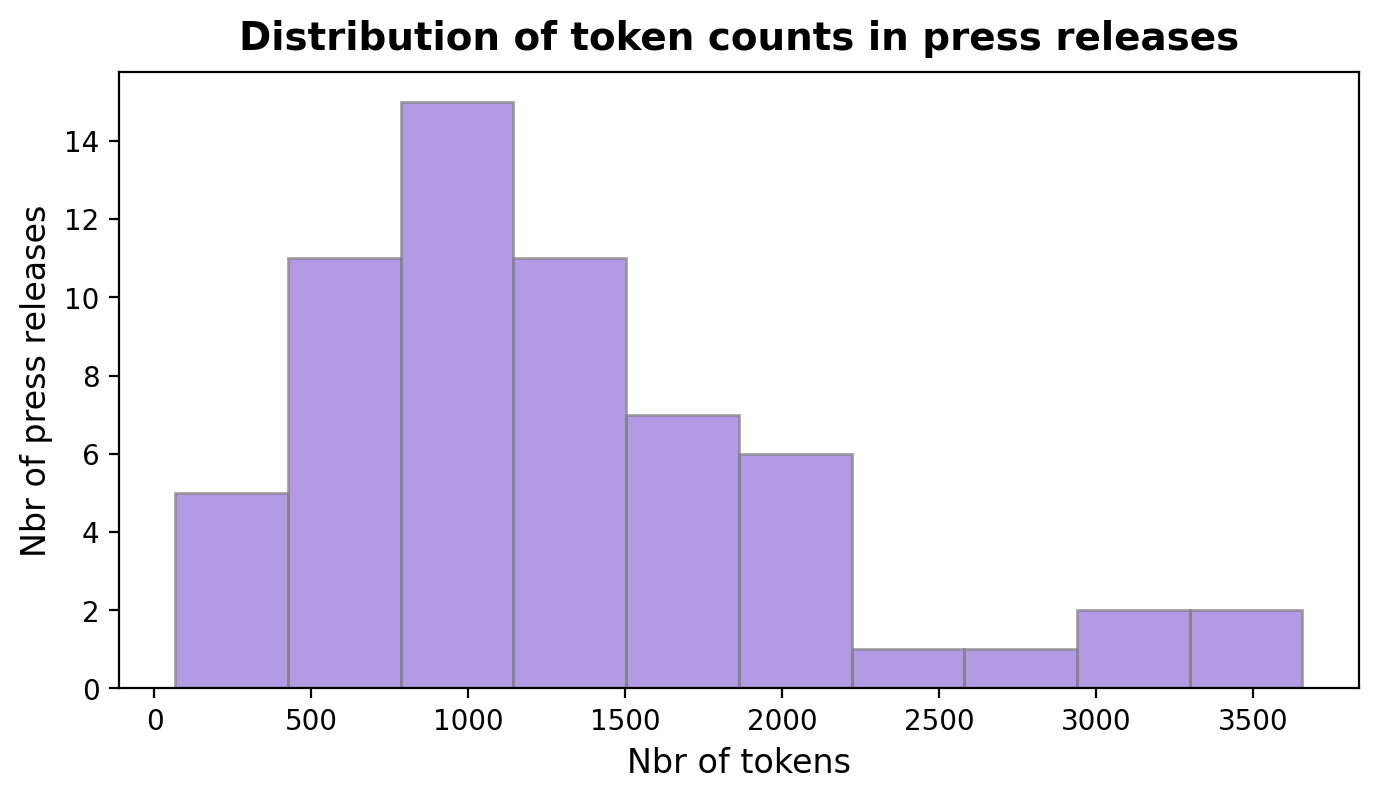

In [71]:
# Plot the number of tokens per press release

# Barplot and font specifications
barplot_specs = {"color": "mediumpurple", "alpha": 0.7, "edgecolor": "grey"}
label_specs   = {"fontsize": 12}
title_specs   = {"fontsize": 14, "fontweight": "bold", "y": 1.01}

plt.figure(figsize=(8,4))

plt.hist(df['text'].apply(lambda x:len(x.split())), **barplot_specs)
plt.xlabel('Nbr of tokens', **label_specs)
plt.ylabel('Nbr of press releases',**label_specs)
plt.title('Distribution of token counts in press releases',**title_specs)
plt.show()

Below we use the describe method to get descriptive statistics for token counts in press releases.

In [72]:
df['text'].apply(lambda x: len(x.split())).describe()

count      61.000000
mean     1287.098361
std       800.633597
min        66.000000
25%       752.000000
50%      1132.000000
75%      1706.000000
max      3658.000000
Name: text, dtype: float64

The shortest press release has 66 tokens, and the longest has 3’658 tokens. The median number of tokens per press release is 1’132.

### Word frequencies
Now, we would like to know a bit more about what each press release is about. One way to answer this question would be to look at the most frequent tokens in each press release. Tokens that are mentioned several times in a text may reveal some information about the content of each press release.

Let’s start with at an example of a press release from the data.

In [73]:
sample = df['text'][0]
print(sample)

Bern, 28.02.2020 - An extraordinary meeting of the Federal Council was held today, 28 February. In view of the current situation and the spread of the coronavirus, the Federal Council has categorised the situation in Switzerland as ‘special’ in terms of the Epidemics Act. Large-scale events involving more than 1000 people are to be banned. The ban comes into immediate effect and will apply at least until 15 March. The Federal Council's top priority is to protect the population. It is responding to the latest developments in the coronavirus epidemic and has categorised the situation in Switzerland as ‘special' in terms of the Epidemics Act. This enables the Federal Council, in consultation with the cantons, to order measures that are normally the responsibility of the cantons.The Federal Council is banning public and private events in Switzerland at which more than 1000 people would gather. This ban on events comes into immediate effect and will apply at least until 15 March. The canton

We can start by splitting the document on whitespace and then count the instances of each token to find the most frequent one. However, there are some issues with this approach. Let’s see why.

In [74]:
# Split text on whitespace
print(sample.split()[0:150])

# Note: we show only the first 150 tokens

['Bern,', '28.02.2020', '-', 'An', 'extraordinary', 'meeting', 'of', 'the', 'Federal', 'Council', 'was', 'held', 'today,', '28', 'February.', 'In', 'view', 'of', 'the', 'current', 'situation', 'and', 'the', 'spread', 'of', 'the', 'coronavirus,', 'the', 'Federal', 'Council', 'has', 'categorised', 'the', 'situation', 'in', 'Switzerland', 'as', '‘special’', 'in', 'terms', 'of', 'the', 'Epidemics', 'Act.', 'Large-scale', 'events', 'involving', 'more', 'than', '1000', 'people', 'are', 'to', 'be', 'banned.', 'The', 'ban', 'comes', 'into', 'immediate', 'effect', 'and', 'will', 'apply', 'at', 'least', 'until', '15', 'March.', 'The', 'Federal', "Council's", 'top', 'priority', 'is', 'to', 'protect', 'the', 'population.', 'It', 'is', 'responding', 'to', 'the', 'latest', 'developments', 'in', 'the', 'coronavirus', 'epidemic', 'and', 'has', 'categorised', 'the', 'situation', 'in', 'Switzerland', 'as', "‘special'", 'in', 'terms', 'of', 'the', 'Epidemics', 'Act.', 'This', 'enables', 'the', 'Federal',

This approach doesn’t separate punctuation from adjacent words. For example, in the following tokens: February., March., Act., etc., the period . wasn’t separated from the preceding token. This is not great as it means February. and February won’t be counted together.

Below, we replace characters such as commas, periods, parentheses and single hyphens (-) with whitespace, using regular expressions.

In [75]:
import re

# Replace punctuation marks (,.()) with whitespace
clean_sample = re.sub(r"[,.()]", # regex pattern
                      " ",       # replace with whitespace
                      sample     # string
                     )

# Replace single hyphens with whitespace
clean_sample = re.sub(r"\s-\s",      # regex pattern
                      " ",           # replace with whitespace
                      clean_sample   # string
                     )

# Print clean_sample
print(clean_sample)

Bern  28 02 2020 An extraordinary meeting of the Federal Council was held today  28 February  In view of the current situation and the spread of the coronavirus  the Federal Council has categorised the situation in Switzerland as ‘special’ in terms of the Epidemics Act  Large-scale events involving more than 1000 people are to be banned  The ban comes into immediate effect and will apply at least until 15 March  The Federal Council's top priority is to protect the population  It is responding to the latest developments in the coronavirus epidemic and has categorised the situation in Switzerland as ‘special' in terms of the Epidemics Act  This enables the Federal Council  in consultation with the cantons  to order measures that are normally the responsibility of the cantons The Federal Council is banning public and private events in Switzerland at which more than 1000 people would gather  This ban on events comes into immediate effect and will apply at least until 15 March  The cantons 

Now we can go ahead and split the clean_sample on whitespace.

In [76]:
# Split clean_sample on whitespace
print(clean_sample.split()[0:150])

# Note: we show only the first 150 tokens

['Bern', '28', '02', '2020', 'An', 'extraordinary', 'meeting', 'of', 'the', 'Federal', 'Council', 'was', 'held', 'today', '28', 'February', 'In', 'view', 'of', 'the', 'current', 'situation', 'and', 'the', 'spread', 'of', 'the', 'coronavirus', 'the', 'Federal', 'Council', 'has', 'categorised', 'the', 'situation', 'in', 'Switzerland', 'as', '‘special’', 'in', 'terms', 'of', 'the', 'Epidemics', 'Act', 'Large-scale', 'events', 'involving', 'more', 'than', '1000', 'people', 'are', 'to', 'be', 'banned', 'The', 'ban', 'comes', 'into', 'immediate', 'effect', 'and', 'will', 'apply', 'at', 'least', 'until', '15', 'March', 'The', 'Federal', "Council's", 'top', 'priority', 'is', 'to', 'protect', 'the', 'population', 'It', 'is', 'responding', 'to', 'the', 'latest', 'developments', 'in', 'the', 'coronavirus', 'epidemic', 'and', 'has', 'categorised', 'the', 'situation', 'in', 'Switzerland', 'as', "‘special'", 'in', 'terms', 'of', 'the', 'Epidemics', 'Act', 'This', 'enables', 'the', 'Federal', 'Counci

We were able to separate punctuation marks from adjacent words and remove single hyphens. Let’s go ahead and find the most common tokens in our text sample. We will use the Counter object from the collections module.

In [77]:
from collections import Counter

# Print top-25 most frequent tokens in clean_sample
Counter(clean_sample.split()).most_common(25)

[('the', 39),
 ('in', 20),
 ('to', 15),
 ('of', 12),
 ('Switzerland', 11),
 ('Federal', 10),
 ('and', 10),
 ('is', 10),
 ('The', 9),
 ('Council', 8),
 ('public', 8),
 ('events', 7),
 ('people', 7),
 ('at', 7),
 ('cantons', 6),
 ('or', 6),
 ('than', 5),
 ('1000', 5),
 ('are', 5),
 ('ban', 5),
 ('will', 5),
 ('situation', 4),
 ('It', 4),
 ('This', 4),
 ('with', 4)]

Here are a few observations:

The words “The” and “the” were counted separately. However, there is no advantage in tracking “The” and “the” separately.
Words such as: “the”, “in”, “to”, etc. are among the most common tokens. These words don’t help us understand what a press release is about.
We will address both issues below.

### Case folding
It is common to convert documents to lowercase; instead of including all capitalized and lowercase versions of a word in the text (e.g., “The”, and “The”), we keep only words in lowercase (“the”).

In [78]:
# Case folding
processed_sample = clean_sample.lower()

print("Convert to lowercase: \n\n{}\n".format(processed_sample))

Convert to lowercase: 

bern  28 02 2020 an extraordinary meeting of the federal council was held today  28 february  in view of the current situation and the spread of the coronavirus  the federal council has categorised the situation in switzerland as ‘special’ in terms of the epidemics act  large-scale events involving more than 1000 people are to be banned  the ban comes into immediate effect and will apply at least until 15 march  the federal council's top priority is to protect the population  it is responding to the latest developments in the coronavirus epidemic and has categorised the situation in switzerland as ‘special' in terms of the epidemics act  this enables the federal council  in consultation with the cantons  to order measures that are normally the responsibility of the cantons the federal council is banning public and private events in switzerland at which more than 1000 people would gather  this ban on events comes into immediate effect and will apply at least unti

### Stop words
Words such as “the”, “in”, “to”, are commonly referred to as stop words and are necessary for a sentence to make sense from a grammatical point of view. However, they are very “frequent” and usually “uninformative”. Hence, in most cases, it is useful to remove them from text.

Many libraries for working with text provide pre-compiled lists of stop words for several languages. We will use the list provided by the NLTK library.

In [79]:
# Load English stopwords from nltk

import nltk

nltk.download("stopwords", quiet=True)

from nltk.corpus import stopwords

stopwords_english = stopwords.words("english")

# Print stopwords

print("{} stopwords in NLTK's list.\n".format(len(stopwords_english)))
print(stopwords_english)

179 stopwords in NLTK's list.

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only',

There are 179 words in NLTK’s stop words list.

We can remove stop words from our document using list comprehensions.

In [80]:
processed_sample_tokens = [tok for tok in processed_sample.split() if tok not in stopwords_english]
print(processed_sample_tokens)

['bern', '28', '02', '2020', 'extraordinary', 'meeting', 'federal', 'council', 'held', 'today', '28', 'february', 'view', 'current', 'situation', 'spread', 'coronavirus', 'federal', 'council', 'categorised', 'situation', 'switzerland', '‘special’', 'terms', 'epidemics', 'act', 'large-scale', 'events', 'involving', '1000', 'people', 'banned', 'ban', 'comes', 'immediate', 'effect', 'apply', 'least', '15', 'march', 'federal', "council's", 'top', 'priority', 'protect', 'population', 'responding', 'latest', 'developments', 'coronavirus', 'epidemic', 'categorised', 'situation', 'switzerland', "‘special'", 'terms', 'epidemics', 'act', 'enables', 'federal', 'council', 'consultation', 'cantons', 'order', 'measures', 'normally', 'responsibility', 'cantons', 'federal', 'council', 'banning', 'public', 'private', 'events', 'switzerland', '1000', 'people', 'would', 'gather', 'ban', 'events', 'comes', 'immediate', 'effect', 'apply', 'least', '15', 'march', 'cantons', 'responsible', 'enforcing', 'ban'

So far, we removed punctuation marks, converted text to lowercase, and removed stop words. Let’s recount words in our text sample.

In [81]:
# Print top-25 most frequent tokens in processed_sample_tokens

Counter(processed_sample_tokens).most_common(25)

[('switzerland', 11),
 ('federal', 10),
 ('council', 8),
 ('public', 8),
 ('events', 7),
 ('people', 7),
 ('cantons', 6),
 ('1000', 5),
 ('ban', 5),
 ('situation', 4),
 ('private', 4),
 ('would', 4),
 ('gather', 4),
 ('event', 4),
 ('held', 3),
 ('spread', 3),
 ('coronavirus', 3),
 ('categorised', 3),
 ('terms', 3),
 ('epidemics', 3),
 ('act', 3),
 ('comes', 3),
 ('immediate', 3),
 ('effect', 3),
 ('apply', 3)]

It looks like our text cleaning was helpful. The topmost frequent tokens in this press release are now more “informative” about its content. It seems that this particular press release is about restricting the number of persons allowed to public and private events to reduce the spread of Covid-19.

At this point, it would be nice to combine all previous cleaning steps into a single function that we will call preprocess_text. This function takes a document, removes common punctuation marks, converts text to lowercase, removes stopwords, and splits on whitespace.

In [83]:
# Define preprocess_text function

def preprocess_text(text):
    
    '''
    This function preprocesses raw samples of text:
    - Converts to lowercase
    - Replaces common punctuation marks with whitespace
    - Removes stop words
    - Splits text on whitespace
    
    INPUT: 
    - text: "raw" text (string)
    
    OUTPUT:
    - processed_sample_tokens: list of tokens (list of strings)
    '''
    
    # Convert to lowercase
    clean_text = text.lower()
    
    # Replace common punctuation marks with whitespace
    clean_text = re.sub(r"[,.()]"," ", clean_text)
    
    # Replace single hyphens with whitespace
    clean_text = re.sub(r"\s-\s"," ", clean_text)
    
    # Remove stop words and split on whitespace
    processed_sample_tokens = [tok for tok in clean_text.split() if tok not in stopwords_english]
    
    return processed_sample_tokens

Let’s test this function with an example. Below we sample a press release randomly from the dataset, using the random library.

In [84]:
# Sample a press release randomly from the data
import random
sample =  df.iloc[random.randint(0,len(df)-1),2]

print(preprocess_text(sample)[0:150])

# Note: we show only the first 150 tokens

['bern', '20', '05', '2020', 'religious', 'services', 'take', 'place', '28th', 'may', '2020', 'order', 'achieve', 'various', 'faith', 'communities', 'must', 'develop', 'protection', 'concepts', 'decision', 'taken', 'federal', 'council', 'meeting', '20th', 'may', '2020', 'also', 'approved', 'urgent', 'amendment', 'epidemics', 'act', 'attention', 'parliament', 'legal', 'basis', 'swisscovid', 'app', 'furthermore', 'instructed', 'federal', 'department', 'home', 'affairs', 'fdha', 'ensure', 'early', 'access', 'vaccines', 'faith', 'communities', 'able', 'resume', 'common', 'religious', 'life', '28th', 'may', '2020', 'services', 'celebrations', 'faiths', 'permitted', 'religious', 'communities', 'one', 'week', 'work', 'protection', 'concepts', 'ensure', 'tracing', 'possible', 'chains', 'infection', 'framework', 'protection', 'concept', 'drawn', 'federal', 'office', 'public', 'health', 'foph', 'legal', 'basis', 'swisscovid-appin', 'addition', 'federal', 'council', 'approved', 'legal', 'basis', 

We can now use this function to process all press releases. This can be done either using list comprehensions or with the apply method.

In [85]:
# 1st alternative (using list comprehensions)

preprocessed_press_releases = [preprocess_text(doc) for doc in df['text']]

# Show an example of processed and tokenized text
print(preprocessed_press_releases[0])

['bern', '28', '02', '2020', 'extraordinary', 'meeting', 'federal', 'council', 'held', 'today', '28', 'february', 'view', 'current', 'situation', 'spread', 'coronavirus', 'federal', 'council', 'categorised', 'situation', 'switzerland', '‘special’', 'terms', 'epidemics', 'act', 'large-scale', 'events', 'involving', '1000', 'people', 'banned', 'ban', 'comes', 'immediate', 'effect', 'apply', 'least', '15', 'march', 'federal', "council's", 'top', 'priority', 'protect', 'population', 'responding', 'latest', 'developments', 'coronavirus', 'epidemic', 'categorised', 'situation', 'switzerland', "‘special'", 'terms', 'epidemics', 'act', 'enables', 'federal', 'council', 'consultation', 'cantons', 'order', 'measures', 'normally', 'responsibility', 'cantons', 'federal', 'council', 'banning', 'public', 'private', 'events', 'switzerland', '1000', 'people', 'would', 'gather', 'ban', 'events', 'comes', 'immediate', 'effect', 'apply', 'least', '15', 'march', 'cantons', 'responsible', 'enforcing', 'ban'

In [86]:
# 2nd alternative (using the apply method)

df['clean_text'] = df['text'].apply(lambda x: preprocess_text(x))

# Show an example of preprocessed and tokenized text
df.sample()


,title,pub_date,text,clean_text
29,Coronavirus: Large-scale events to be permitted from October under strict conditions and with a permit,2020-08-12,"Bern, 12.08.2020 - At its meeting on 12 August, the Federal Council took the decision to re-allow events for more than 1000 people from 1 October. Strict protective measures will apply and the events will have to be authorised by the cantons, taking into account the local epidemiological situation and their contact tracing capacity. The Federal Council thereby intends to ensure that the epidemiological situation in Switzerland does not deteriorate. At the same time, this careful reopening st...","[bern, 12, 08, 2020, meeting, 12, august, federal, council, took, decision, re-allow, events, 1000, people, 1, october, strict, protective, measures, apply, events, authorised, cantons, taking, account, local, epidemiological, situation, contact, tracing, capacity, federal, council, thereby, intends, ensure, epidemiological, situation, switzerland, deteriorate, time, careful, reopening, step, takes, account, needs, society, economic, interests, sports, clubs, cultural, venues, federal, depar..."


### Collocations
There is one more thing we can do with our texts. We can look for combinations of words that frequently appear together, such as Federal Council, private event, Covid certificate, etc. We often call these word combinations: phrases or collocations. These word combinations appear in texts more frequently than their constituent words appear individually.

We will use Gensim’s Phrases model to detect collocations in our corpus. model.phrases will identify the most common collocations and join the constituent tokens into a single token, using the “_” glue character.

Examples:
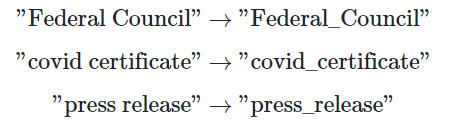


In [87]:
# Import Gensim and Phrases

from gensim.models import Phrases

We start by creating an instance of the Phrases model.


In [88]:
# Find common collocations in press releases

# Create an instance of the Phrases model
n_gram_model = Phrases(preprocessed_press_releases,       # Expected input format: list of tokenized texts
                       min_count=5,                       # Keeps only collocations with at least min_counts 
                       delimiter=b'_')                    # Glue character used to join collocation tokens

In the cell above, we set min_count to 5 to ignore any collocation appearing less than 5 times in the corpus. However, please note that this value is arbitrary.

In the next step, we apply the n_gram_model model to the press releases texts.

In [89]:
# Apply Phrases to press releases

preprocessed_press_releases_collocations = [n_gram_model[doc] for doc in preprocessed_press_releases]

In [90]:
# Add processed press releases (with collocations) to dataframe

df['clean_text'] = preprocessed_press_releases_collocations

Let’s print one example to see how it looks like.

In [91]:
print(preprocessed_press_releases_collocations[0])

['bern', '28', '02', '2020', 'extraordinary', 'meeting', 'federal_council', 'held', 'today', '28', 'february', 'view', 'current', 'situation', 'spread_coronavirus', 'federal_council', 'categorised', 'situation', 'switzerland', '‘special’', 'terms_epidemics', 'act', 'large-scale_events', 'involving', '1000_people', 'banned', 'ban', 'comes', 'immediate', 'effect', 'apply', 'least', '15', 'march', "federal_council's", 'top_priority', 'protect_population', 'responding', 'latest', 'developments', 'coronavirus', 'epidemic', 'categorised', 'situation', 'switzerland', "‘special'", 'terms_epidemics', 'act', 'enables', 'federal_council', 'consultation', 'cantons', 'order', 'measures', 'normally', 'responsibility', 'cantons', 'federal_council', 'banning', 'public', 'private_events', 'switzerland', '1000_people', 'would', 'gather', 'ban', 'events', 'comes', 'immediate', 'effect', 'apply', 'least', '15', 'march', 'cantons_responsible', 'enforcing', 'ban', 'case', 'public', 'private_events', 'fewer_

As we see, the Phrases model has detected a few collocations in this press release, such as “federal_council”, “private_events”, “terms_epidemics”, “cantonal_authorities”, etc.

Below we count and plot the most frequent words in a randomly selected press release. This time we include collocations in the most common words.



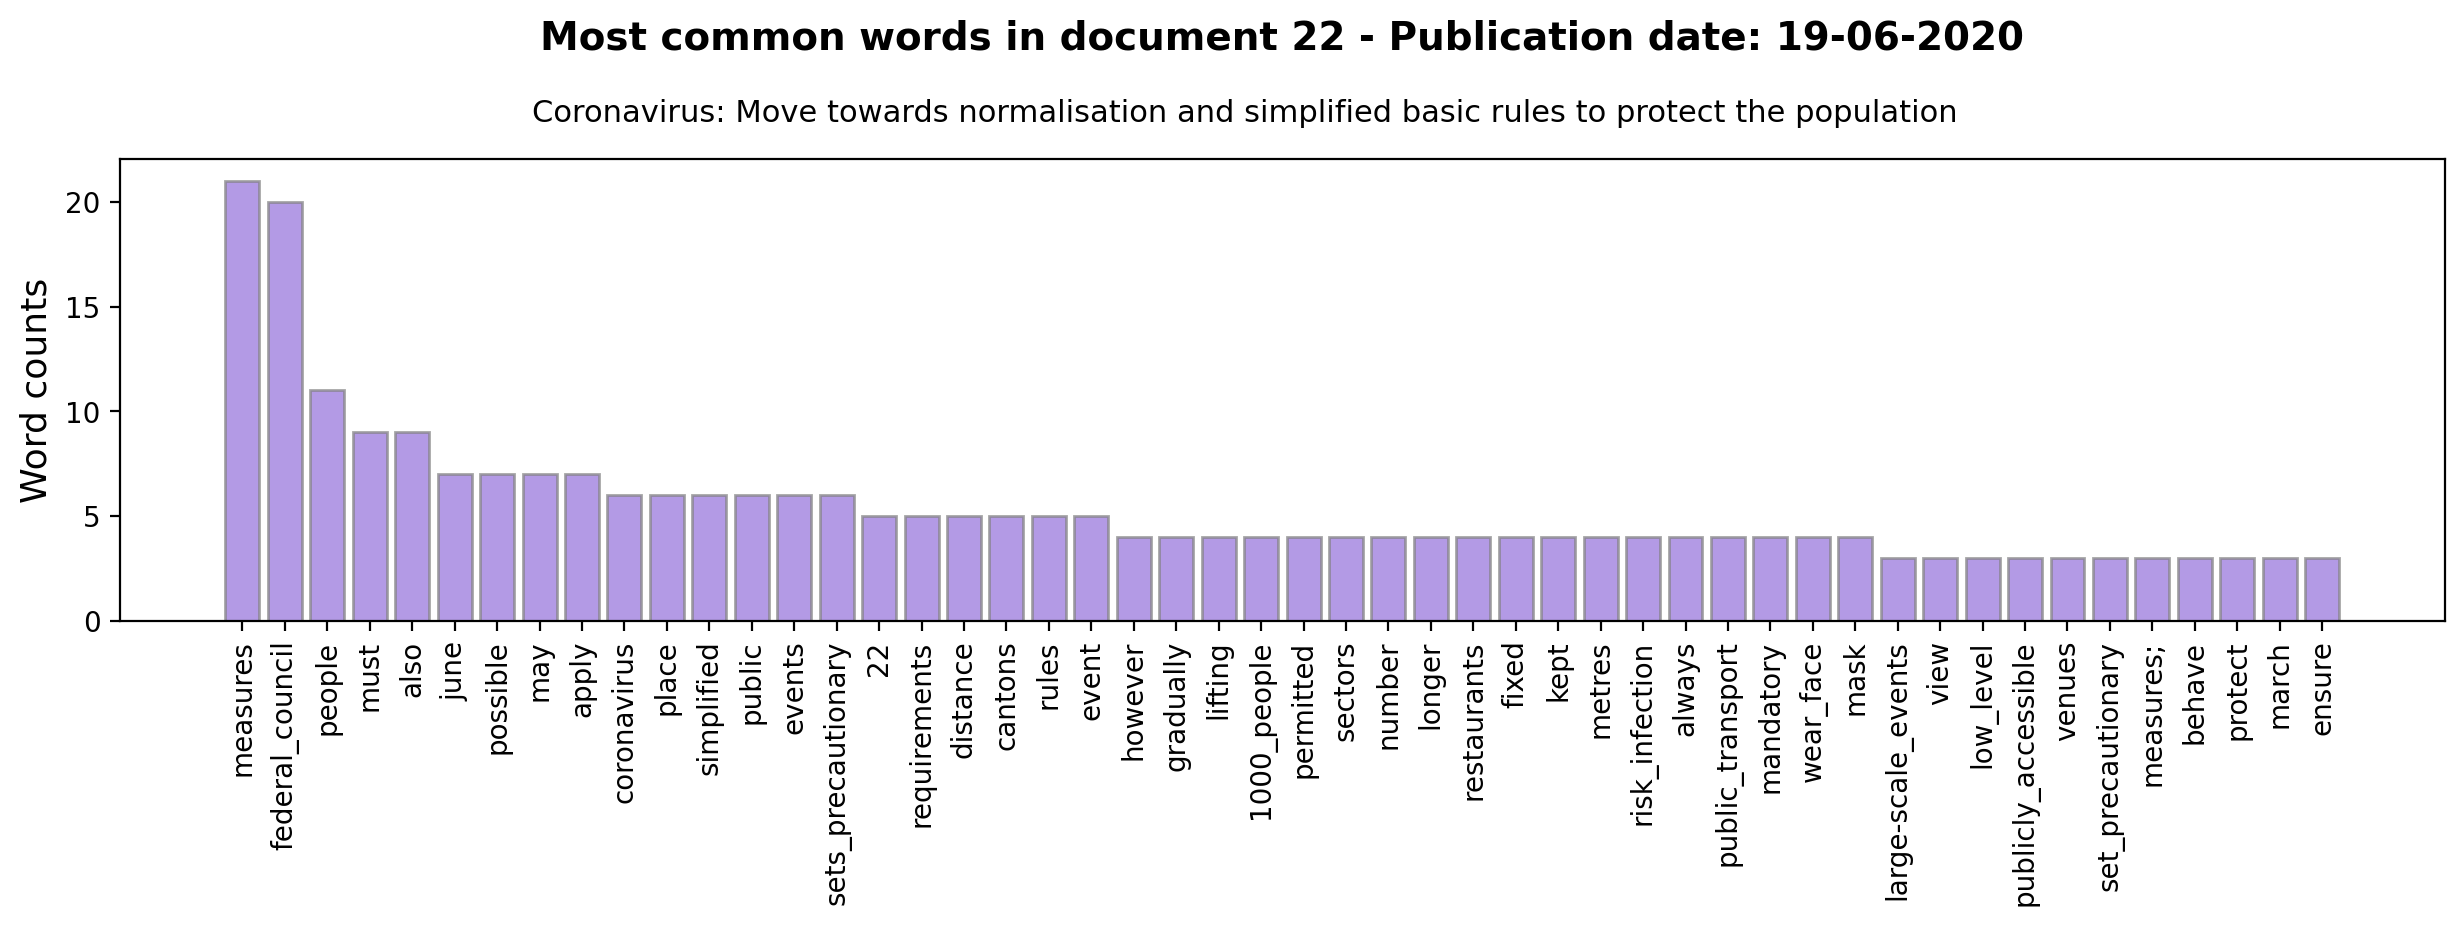

In [92]:
# Generates a random integer between 0 and len(df)
idx = random.randint(0,len(df))

# Find top-50 most common words
w = Counter(preprocessed_press_releases_collocations[idx]).most_common(50)

# Plots top words

# Barplot and font specifications
barplot_specs   = {"color": "mediumpurple", "alpha": 0.7, "edgecolor": "grey"}
title_specs     = {"fontsize": 14, "fontweight": "bold", "y": 1.2}
suptitle_specs  = {"fontsize": 11}
label_specs     = {"fontsize": 13}

plt.figure(figsize=(15,3))
plt.bar(*zip(*w), **barplot_specs)
plt.title('Most common words in document {} - Publication date: {}'.format(idx,df.iloc[idx,1].strftime("%d-%m-%Y")), **title_specs)
plt.suptitle(df.iloc[idx,0],**suptitle_specs)
plt.ylabel('Word counts', **label_specs)
plt.xticks(rotation=90)
plt.show()

Don’t hesitate to run the previous cell several times and to compare your findings with the original text. Do the topmost frequent words help guess the “topic” of the press release?



In [93]:
# Print the original unprocessed text corresponding to the previous plot 
print('Printing document {}:\n'.format(idx))
print(df.iloc[idx,2])

Printing document 22:

Bern, 19.06.2020 - As of Monday, 22 June, the measures put in place to tackle the coronavirus will for the most part be lifted. Only the ban on large-scale events will remain in place until the end of August. This follows the decisions taken by the Federal Council at its meeting on 19 June in view of the continuing low level of new cases. All publicly accessible venues must have a set of precautionary measures in place. However, the Federal Council has simplified the applicable requirements. Hand hygiene and keeping an appropriate distance remain the most important protective measures; the Federal Council continues to rely on the public to behave responsibly. The Federal Council began to introduce measures to protect against the coronavirus on 28 February, and gradually tightened those measures up until 21 March, before gradually easing them again in three phases from 27 April. The number of new infections, hospitalisations and deaths has continued to fall despit

Tf-idf weighting model
So far, we have sorted words in documents by their frequencies.

However, words that are very frequent across all documents in our corpus aren’t necessarily “informative”. For example, we are working with a corpus of official press releases from the Swiss Federal Council about the Coronavirus disease. We naturally expect tokens such as “Federal Council”, “Switzerland”, “Coronavirus”, “Federal government”, etc., to appear very often in all press releases. However, these tokens aren’t necessarily conveying any “distinct information” about a press release’s specific content, which may be about various topics such as vaccines, measures to contain the epidemic, testing, etc. We would like to give the words specific to a given press release higher weights so that we can discriminate it from other press releases in the same corpus.

Therefore, we may want to:

- Diminish the importance of widespread words over the entire corpus of documents as they could shadow rarer yet more interesting words.
- Focus more on rare words across the corpus, as they could be more informative about the content of individual press releases.


This is known as tf–idf weighting model, where tf stands for term-frequency and idf stands for inverse document frequency and is a “measure” of a word’s “rarity” in the corpus. The higher the idf, the “rarer” the word in the corpus. In other words, tf-idf model favors words, or terms, that are frequent in few documents.

Tf–idf is calculated as:
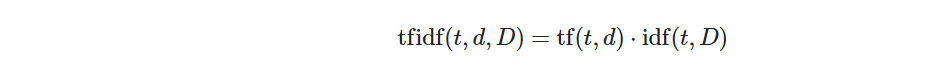

where:

- t : term,
- d : document
- D : corpus.

The tf-idf model multiplies the usual frequency statistics tf by a weight factor idf in order to give a more informative score to each word. If you want to know more about the tf-idf model, please look at this wikipedia page.

Below, we will use the tf-idf weighting model from scikit-learn; a library that we will use very often in the following courses.

We start by importing the tf-idf model from scikit-learn and creating an instance of it.

In [94]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of the tf-idf model
tfidf = TfidfVectorizer()

Please note that the tf-idf model expects non-tokenized text; using it directly with preprocessed_press_releases_collocations would throw an error. This is why below we use the join() function to join lists of tokens into single strings.

In [95]:
# Join lists of tokens into single strings (for each press release)

X = [" ".join([w for w in doc]) for doc in preprocessed_press_releases_collocations]

Next, we call the fit method of TfidfVectorizer() on our text data.

In [96]:
# Fit model on text data
tfidf.fit(X);

A couple of things happen once we call the fit method of TfidfVectorizer() on our text data.

First, the TfidfVectorizer model tokenizes texts and builds the vocabulary. The vocabulary is the list of unique words in our corpus. We can check which words are part of the vocabulary using the get_feature_names_out() method.



In [97]:
# Show vocabulary
vocabulary = tfidf.get_feature_names_out()

# Print vocabulary length
print('Vocabulary length: {}\n'.format(len(vocabulary)))

# Show a few words from vocabulary
print('Show a few words from vocabulary:')
print(vocabulary[0:500:10])

Vocabulary length: 3947

Show a few words from vocabulary:
['000' '07' '11' '128' '16' '19_april' '1_july' '2021' '23' '27_may'
 '30_people' '480' '5_million' '72' '85' 'able' 'accept' 'accompanying'
 'act' 'acute' 'additional' 'adjustment' 'adolescents' 'advantages'
 'affects' 'age_16' 'ahead' 'airline' 'allfollowing' 'allowedfrom'
 'always' 'amounting' 'announced' 'anyone' 'appeared' 'appointment'
 'april_2020' 'armed' 'article' 'assessments' 'assume_cost'
 'asymptomatic_persons' 'attention' 'austrian' 'automatically'
 'aviation_industry' 'back' 'banned' 'basically' 'beds']


In our case, there are 3’947 words in our vocabulary. Once the texts are tokenized, and the vocabulary is established, tf-idf computes word frequencies tf and inverse document frequencies idf.

To transform each sample of text in our corpus into its tf-idf representation, we call the transform() method.

In [98]:
# Get tf-idf representation of text data
X_tfidf = tfidf.transform(X)
print(X_tfidf.shape)

(61, 3947)


The shape of X_tfidf is (61, 3947). Each row corresponds to a text document from the corpus and each column to a word in the vocabulary.

We can check what X_tfidf looks like using the following code snippet.

In [99]:
df_tfidf = pd.DataFrame(X_tfidf.toarray(),
                        columns=vocabulary)
df_tfidf.head()

,000,000_people,01,02,03,04,04_2020,05,05_2020,06,...,young_people,younger,youth,zealand,zero,zones,zoos,zoos_botanical,zoosin,zurich
0,0.000000,0.0,0.0,0.054617,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.000000,0.014843,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.032799,0.0,0.0,0.000000,0.016399,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.000000,0.035813,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.123561,0.0,0.0,0.000000,0.020593,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.064655,0.0,0.0,0.0,0.0,0.0


The tf-Idf model has converted each document to a list of tf-idf scores. Each row corresponds to a document from the corpus. For example, the first press release is represented by this list of numbers: [0, 0, 0, 0.054617, 0, 0, …., 0, 0]. Note that tf-idf results in long vectors that are sparse (mostly filled with zeros).

### Top words according to tf-idf scores
Instead of looking at the topmost frequent words in each press release, we will focus on words with the highest tf-idf scores in each document. Remember, tf-idf favors words that are frequent in few press releases. We hope that this way, the importance of widespread words across all press releases (such as “Federal Council”, etc.) will be diminished, letting us focus on other more informative words about the content of individual press releases.

Below we plot the top 50 words according to the tf-idf scores.



In [100]:
# Set number of top words to plot
N = 50

print('Printing top words according to tf-idf for document {}.'.format(idx))

Printing top words according to tf-idf for document 22.


In [101]:
# Sort indexes according to tf-idf scores for document idx

index_sorted = np.argsort(df_tfidf.iloc[idx,:])[::-1]  # descending order

# Print sorted indexes according to tf-idf
index_sorted.values

array([2204, 3224, 3269, ..., 2570, 2569,    0], dtype=int64)

In [102]:
# Sort words in vocabulary according to tf-idf

features_sorted = np.array(vocabulary)[index_sorted][0:N]

# Print top words according to tf-idf scores
print(features_sorted)

['measures' 'sets_precautionary' 'simplified' 'federal_council' 'kept'
 '22' 'people' 'always' 'wear_face' 'risk_infection' 'sectors' 'must'
 'apply' 'june' 'metres' 'gradually' 'behave' 'distance' '1000_people'
 'mandatory' 'fixed' 'events' 'place' 'requirements' 'responsibly' 'rules'
 'event' 'set_precautionary' 'lifting' 'also' 'mask' 'public_transport'
 'public' 'low_level' 'possible' 'may' 'basic' 'coronavirus' 'individuals'
 'restaurants' 'longer' 'minutes' 'possiblein' 'demonstration' 'fit'
 'allfollowing' 'demonstrationsmasks' 'fourth' 'relying' 'heavily']


In [103]:
# Sort tf-idf scores (descending order)

tfidf_weights_sorted = df_tfidf.iloc[idx,:][index_sorted][0:N]
print(tfidf_weights_sorted)

measures               0.242244
sets_precautionary     0.191052
simplified             0.158180
federal_council        0.158083
kept                   0.127368
22                     0.125724
people                 0.125050
always                 0.118273
wear_face              0.118273
risk_infection         0.111218
sectors                0.111218
must                   0.109809
apply                  0.105582
june                   0.105582
metres                 0.105453
gradually              0.105453
behave                 0.105141
distance               0.101259
1000_people            0.100579
mandatory              0.100579
fixed                  0.100579
events                 0.096561
place                  0.096561
requirements           0.095604
responsibly            0.095526
rules                  0.093053
event                  0.090657
set_precautionary      0.088704
lifting                0.086289
also                   0.083650
mask                   0.083538
public_t

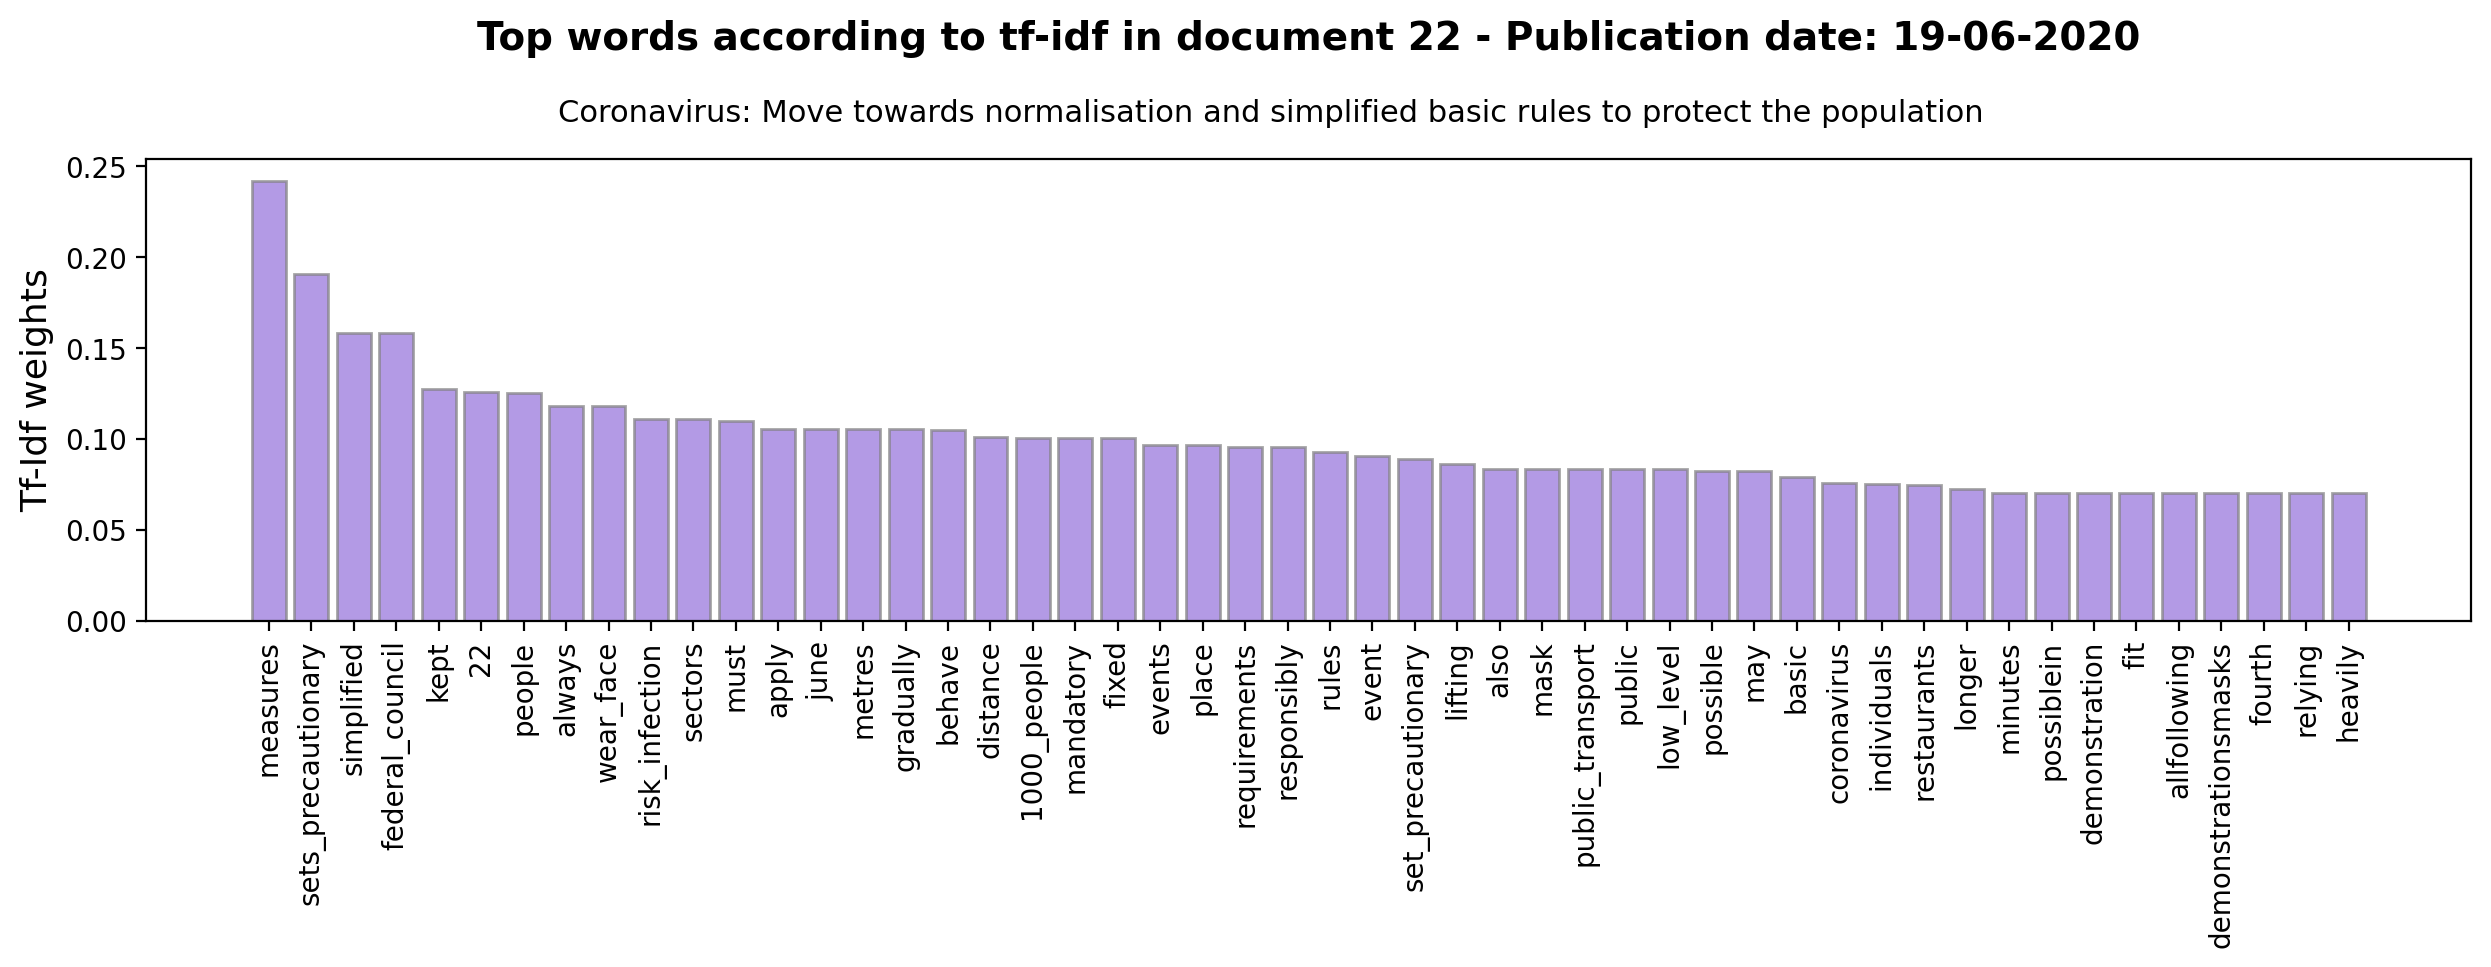

In [105]:
# Plots top words according to tf-idf scores

# Barplot and font specifications
barplot_specs   = {"color": "mediumpurple", "alpha": 0.7, "edgecolor": "grey"}
title_specs     = {"fontsize": 14, "fontweight": "bold", "y": 1.2}
suptitle_specs  = {"fontsize": 11}
label_specs     = {"fontsize": 13}

plt.figure(figsize=(15,3))

plt.bar(x = features_sorted,
        height=tfidf_weights_sorted,
        **barplot_specs)

plt.title('Top words according to tf-idf in document {} - Publication date: {}'.format(idx,df.iloc[idx,1].strftime("%d-%m-%Y")), **title_specs)
plt.suptitle(df.iloc[idx,0],**suptitle_specs)
plt.ylabel('Tf-Idf weights', **label_specs)
plt.xticks(rotation=90)
plt.show()

Don’t hesitate to compare this approach with the topmost frequent words for the same press release. Hopefully, diminishing the importance of widespread words across all documents has helped to focus on rare words that are more informative about the content of individual press releases. You can experiment with both techniques to see which works best in your particular case.

### Summary
Let’s summarize what we’ve learned in this unit. Here are the main takeaways:

- Working with text data requires preprocessing to remove unnecessary words and reduce variability by standardizing words into a common form.
- Word frequencies can reveal information about the content of a document.
- Tf-idf weighting allows focusing less on widespread words across all documents in a dataset and more on words that occur in a small fraction of the corpus.